In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

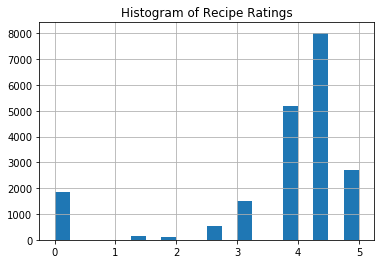

In [5]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

## Challenge

Use RFC and feature importance to narrow down features to the top 30. Then plug them back into a SVM classifier

In [7]:
raw_data = raw_data.dropna()

#create binary for outcome 
y = raw_data['rating'].apply(lambda x: 1 if x >= 4 else 0)
#Add cal/fat/protein
X = raw_data.drop(['rating', 'title'], 1).dropna()



In [8]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

clf = ensemble.RandomForestClassifier()


cross_val_score(clf, X, y, cv=5)

array([ 0.62224323,  0.61613615,  0.62622124,  0.62736444,  0.62200504])

In [9]:
df = pd.DataFrame()
df['imp']= clf.fit(X, y).feature_importances_
df['features'] = X.columns

In [10]:
df.sort_values(by = 'imp', ascending = False).head(30)


,imp,features
0,0.060499,calories
3,0.056709,sodium
2,0.049210,fat
1,0.045919,protein
61,0.011000,bon appétit
506,0.009532,quick & easy
665,0.008527,winter
244,0.008376,gourmet
208,0.008165,fall
36,0.007742,bake


In [11]:
#make a list of top 30 features
new_feat = df['features'].iloc[0:30].tolist() 

#set outcome
y = raw_data['rating'].apply(lambda x: 1 if x >= 4 else 0)


#trim features
df_feat = pd.DataFrame()
X_int = raw_data.drop(['rating', 'title'], 1)


for features in new_feat:
    df_feat[features] = X_int[features]
    
X = df_feat



In [12]:
svc = SVC()
svc.fit(X,y)
scores = cross_val_score(svc, X, y, cv=5)
scores


array([ 0.60649023,  0.59596596,  0.6126694 ,  0.6056116 ,  0.61569987])

## Using PCA 

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

#reset X and y
raw_data = raw_data.dropna()

#create binary for outcome 
y = raw_data['rating'].apply(lambda x: 1 if x >= 4 else 0)
#Add cal/fat/protein
X = raw_data.drop(['rating', 'title'], 1).dropna()

#use pipeline
#Most features are from 0-5, but cal/fat/pro are continous. Does that affect scaling?
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 30),
                       SVC())

scores = cross_val_score(pipe_lr, X, y, cv=5)
scores


array([ 0.59325772,  0.60100851,  0.59848724,  0.61286255,  0.60592686])

I acheived slightly better results by using an RFC for feature selection while maintaining interpretability. 

The PCA route was less accurate with less interpretability but was much quicker and easier to imp